In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor

### Data Collection

In [3]:
import requests

# URLs of the files
train_data_url = 'https://www.raphaelcousin.com/modules/module5/exercise/module5_exercise_train.csv'
test_data_url = 'https://www.raphaelcousin.com/modules/module5/exercise/module5_exercise_test.csv'

# Function to download a file
def download_file(url, file_name):
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f'Downloaded {file_name} from {url}')

# Downloading the files
download_file(train_data_url, 'module5_exercise_train.csv')
download_file(test_data_url, 'module5_exercise_test.csv')

Downloaded module5_exercise_train.csv from https://www.raphaelcousin.com/modules/module5/exercise/module5_exercise_train.csv
Downloaded module5_exercise_test.csv from https://www.raphaelcousin.com/modules/module5/exercise/module5_exercise_test.csv


In [4]:
df_train =  pd.read_csv("module5_exercise_train.csv", sep=",")
df_test =  pd.read_csv("module5_exercise_test.csv", sep=",")

### Data analysis

In [6]:
#### Make a complete analysis on data preprocessing
# Inconsistencies
# Duplicates (data.duplicated().sum())
# Missing values (data.isnull().sum())
# Categorical
# Outliers
# Feature Engineering
# Feature Selection and/or Dimensionality Reduction

In [7]:
df_train.shape

(1909, 16)

In [8]:
df_test.shape

(365, 15)

In [9]:
data = pd.concat([df_train, df_test], axis=0)

In [10]:
data.sample(20)

,date,weather_condition,humidity,wind_speed,oil_brent_price_indicator,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,temperature_station9,temperature_station10,electricity_demand
54,2019-02-24,Snowy,67.592075,13.55 km/h,High,-0.198824,0.378809,-0.055445,0.199806,0.335856,-0.986069,NaN,0.304305,-0.691350,-0.600998,NaN
1461,2018-11-01,Rainy,58.339588,1.26 m/s,Moderate,7.134961,7.851833,7.468619,6.564020,7.859262,7.358656,6.296691,NaN,NaN,6.952214,248.487423
102,2019-04-13,Rainy,68.834179,11.88 km/h,High,NaN,22.070344,22.322269,22.292993,21.613293,NaN,NaN,21.744480,NaN,21.810834,NaN
852,2017-04-03,Rainy,70.080633,5.48 m/s,Moderate,NaN,NaN,13.984177,13.738653,13.200981,13.674051,13.549997,13.590077,NaN,13.618611,198.370466
1328,2018-07-02,Cloudy,52.476195,3.83 m/s,Low,29.663848,28.884786,29.883243,30.607559,30.147081,30.744184,29.284320,NaN,NaN,NaN,181.732429
1312,2018-06-17,Cloudy,55.854194,1.42 m/s,Very High,28.080563,28.393226,27.640055,28.352006,27.963576,27.549401,28.504837,NaN,28.630258,29.003447,255.497443
1457,2018-10-29,Rainy,71.203491,12.92 km/h,Very Low,8.255650,8.522184,8.435699,8.875340,8.189644,8.134513,8.927710,8.297301,7.747701,8.438493,224.566089
884,2017-05-04,Rainy,60.553271,4.20 m/s,Low,14.306239,NaN,15.147569,13.862496,14.522038,14.762631,14.589899,14.896769,13.576060,14.481165,219.087517
45,2019-02-15,Snowy,67.842871,13.78 km/h,High,4.016657,3.750386,NaN,3.807030,4.497674,NaN,3.134026,NaN,4.085523,4.528135,NaN
556,2016-06-28,Sunny,41.265270,19.29 km/h,Moderate,32.589531,32.921216,32.129801,31.843119,31.727540,NaN,NaN,32.910224,31.948060,NaN,189.203471


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2274 entries, 0 to 364
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       2274 non-null   object 
 1   weather_condition          2246 non-null   object 
 2   humidity                   2165 non-null   float64
 3   wind_speed                 2167 non-null   object 
 4   oil_brent_price_indicator  2274 non-null   object 
 5   temperature_station1       1930 non-null   float64
 6   temperature_station2       1946 non-null   float64
 7   temperature_station3       1934 non-null   float64
 8   temperature_station4       1954 non-null   float64
 9   temperature_station5       1937 non-null   float64
 10  temperature_station6       1953 non-null   float64
 11  temperature_station7       1913 non-null   float64
 12  temperature_station8       1938 non-null   float64
 13  temperature_station9       1924 non-null   float64
 14

In [12]:
data.describe()

,humidity,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,temperature_station9,temperature_station10,electricity_demand
count,2165.000000,1930.000000,1946.000000,1934.000000,1954.000000,1937.000000,1953.000000,1913.000000,1938.000000,1924.000000,1907.000000,1909.000000
mean,107.035790,13.396383,13.077731,13.199494,13.310531,13.312156,13.301409,13.296276,13.350021,13.484352,13.331970,106.378555
std,1517.524083,10.775543,10.772682,10.782193,10.817318,10.775815,10.796030,10.755605,10.763963,10.776536,10.796021,5115.886615
min,32.814149,-12.819683,-12.316331,-12.904753,-12.783663,-9.513493,-12.873628,-12.752546,-13.213493,-13.369174,-12.360144,-223288.771683
25%,54.128279,5.489321,4.987520,5.204434,5.219280,5.240711,5.380471,5.499581,5.322248,5.585514,5.305135,185.065853
50%,62.208706,12.865173,12.693993,12.704200,12.911890,12.810285,12.799441,12.795622,13.067600,12.846059,12.872528,214.482125
75%,68.142186,22.857480,21.740908,22.198554,22.474576,22.512605,22.321765,22.393285,22.018201,22.646406,22.439541,257.229149
max,50000.000000,35.456648,37.267279,37.727810,38.133324,38.471490,38.588948,37.769152,38.098873,38.470479,37.651955,387.741952


#### Identifying inconsistencies in data types or values

In [14]:
import re

print("Inconsistencies in weather_condition:")
print(data["weather_condition"].nunique())
print("Inconsistencies in oil_brent_price_indicator:")
print(data["oil_brent_price_indicator"].nunique())
print("Inconsistencies in date:")
print(data['date'].apply(lambda x: not re.match(r'\d{4}-\d{2}-\d{2}', x)).sum())

Inconsistencies in weather_condition:
4
Inconsistencies in oil_brent_price_indicator:
5
Inconsistencies in date:
0


No formatting inconsistencies in "weather_conditon", "oil_brent_price_indicator" or "date".

In [16]:
data['wind_speed'].apply(type).value_counts()

wind_speed
<class 'str'>      2167
<class 'float'>     107
Name: count, dtype: int64

No mixed data types within a column except in the "wind_speed" column.

In [18]:
data[data['wind_speed'].apply(type) == float]

,date,weather_condition,humidity,wind_speed,oil_brent_price_indicator,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,temperature_station9,temperature_station10,electricity_demand
14,2015-01-21,Snowy,69.124236,NaN,Very Low,-7.022809,-5.748753,-6.790255,-6.370345,-7.510294,-6.607260,-7.580778,-6.863959,NaN,-6.223665,303.019437
16,2015-01-23,Snowy,61.122616,NaN,High,-4.166763,-4.788067,NaN,-3.953095,-4.089131,-5.229595,-4.524754,-4.501473,NaN,NaN,357.519718
35,2015-02-11,Cloudy,64.211620,NaN,Low,0.383906,-1.312244,0.898632,0.140126,0.520272,NaN,0.983895,-0.068810,0.711870,0.103597,269.789743
46,2015-02-22,Sunny,57.331224,NaN,Moderate,-6.391050,-5.091116,-6.647755,-6.585044,-6.706258,NaN,-6.236636,-5.787613,NaN,-6.196583,287.978006
95,2015-04-10,Rainy,64.742857,NaN,Moderate,15.863497,16.203570,16.454783,15.440076,14.444398,15.717709,15.811400,15.582605,NaN,15.949213,196.671590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2019-09-04,Sunny,56.929097,NaN,Moderate,NaN,17.278039,17.758010,16.673111,17.628246,NaN,17.022402,17.385042,17.013770,17.733314,NaN
270,2019-09-28,Rainy,73.291850,NaN,Very High,10.289911,10.173100,10.259729,11.131176,9.627454,NaN,9.993418,10.466991,10.565587,10.518102,NaN
271,2019-09-29,Rainy,76.640238,NaN,Very High,11.762993,11.622418,11.768783,11.689437,11.973268,11.929004,12.826931,12.332807,NaN,11.639181,NaN
306,2019-11-03,Rainy,68.304536,NaN,High,9.735451,10.295516,9.966776,9.579859,9.674634,10.268542,10.208294,9.698276,9.999351,NaN,NaN


#### Identifying duplicates

In [20]:
print("Duplicates:")
duplicates = data[data.duplicated(keep=False)].sort_values(by=data.columns.tolist())
duplicates

Duplicates:


,date,weather_condition,humidity,wind_speed,oil_brent_price_indicator,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,temperature_station9,temperature_station10,electricity_demand
5,2015-01-13,Cloudy,58.649834,28.75 km/h,High,-5.037719,-4.891658,-4.655657,-5.545906,NaN,-5.323173,-5.771092,NaN,-4.554718,-4.719306,303.623789
6,2015-01-13,Cloudy,58.649834,28.75 km/h,High,-5.037719,-4.891658,-4.655657,-5.545906,NaN,-5.323173,-5.771092,NaN,-4.554718,-4.719306,303.623789
51,2015-02-27,Snowy,61.321278,11.61 km/h,Moderate,-0.765329,-1.089098,-0.272114,-1.010996,-1.117890,-0.483191,-1.151202,-0.835624,NaN,NaN,315.651282
52,2015-02-27,Snowy,61.321278,11.61 km/h,Moderate,-0.765329,-1.089098,-0.272114,-1.010996,-1.117890,-0.483191,-1.151202,-0.835624,NaN,NaN,315.651282
58,2015-03-05,Cloudy,54.187891,1.02 m/s,Very Low,11.442087,12.320326,10.781174,10.926194,11.684710,11.934129,11.126555,11.184591,12.166137,11.424691,227.826146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1886,2019-12-11,NaN,61.201308,27.61 km/h,Moderate,0.743648,1.006100,NaN,0.593362,0.851021,0.336086,0.934330,NaN,NaN,0.879479,301.559770
1892,2019-12-17,Snowy,65.362283,5.21 m/s,Moderate,-2.380559,-2.727055,-2.769237,NaN,-1.560074,-2.888126,NaN,NaN,-2.474213,-2.380799,290.157907
1893,2019-12-17,Snowy,65.362283,5.21 m/s,Moderate,-2.380559,-2.727055,-2.769237,NaN,-1.560074,-2.888126,NaN,NaN,-2.474213,-2.380799,290.157907
1905,2019-12-29,Rainy,68.085227,7.24 m/s,Moderate,3.688132,3.919479,NaN,4.071717,4.365347,3.580358,3.404292,4.173461,3.755625,4.070333,266.231273


In [21]:
print(f"Number of duplicates: {data.duplicated().sum()}")

Number of duplicates: 90


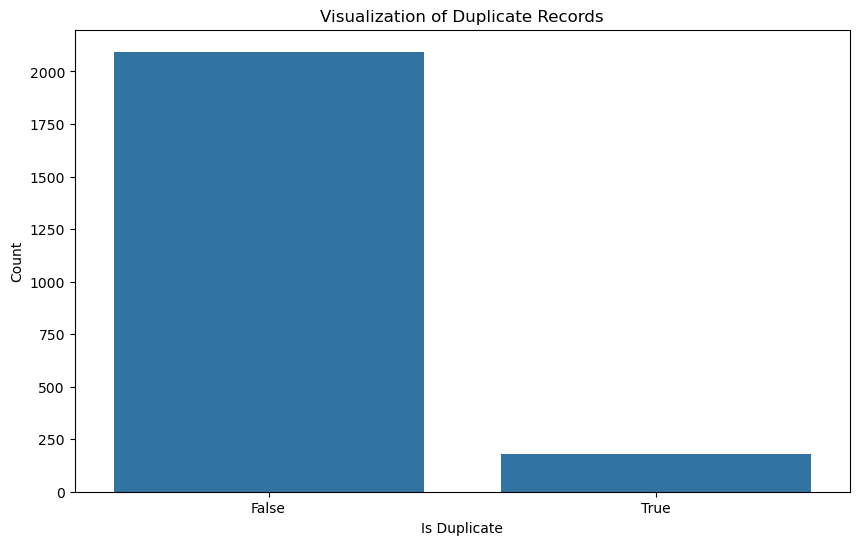

In [22]:
data['is_duplicate'] = data.duplicated(keep=False)

plt.figure(figsize=(10, 6))
sns.countplot(x='is_duplicate', data=data)
plt.title('Visualization of Duplicate Records')
plt.xlabel('Is Duplicate')
plt.ylabel('Count')
plt.show()

In [23]:
data = data.drop(columns=['is_duplicate'], axis=1)

#### Identifying missing values

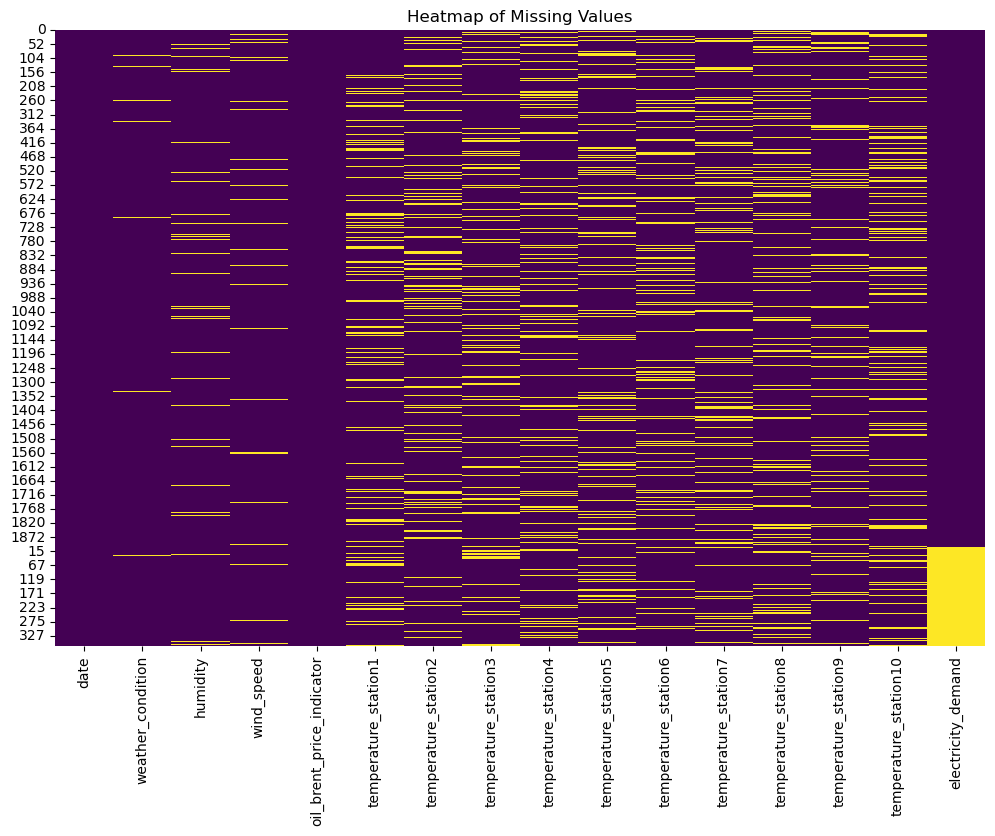

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

In [26]:
print("Percentage of missing values per column:")
print((df_train.isnull().sum() / len(df_train) * 100).round(2))

Percentage of missing values per column:
date                          0.00
weather_condition             1.26
humidity                      5.03
wind_speed                    4.71
oil_brent_price_indicator     0.00
temperature_station1         14.93
temperature_station2         14.41
temperature_station3         15.14
temperature_station4         14.51
temperature_station5         14.61
temperature_station6         14.30
temperature_station7         16.13
temperature_station8         14.77
temperature_station9         15.09
temperature_station10        16.55
electricity_demand            0.00
dtype: float64


In [27]:
print("Percentage of missing values per column:")
print((data.isnull().sum() / len(data) * 100).round(2))

Percentage of missing values per column:
date                          0.00
weather_condition             1.23
humidity                      4.79
wind_speed                    4.71
oil_brent_price_indicator     0.00
temperature_station1         15.13
temperature_station2         14.42
temperature_station3         14.95
temperature_station4         14.07
temperature_station5         14.82
temperature_station6         14.12
temperature_station7         15.88
temperature_station8         14.78
temperature_station9         15.39
temperature_station10        16.14
electricity_demand           16.05
dtype: float64


#### Categorical

In [29]:
data['weather_condition'].value_counts()

weather_condition
Rainy     683
Sunny     681
Cloudy    669
Snowy     213
Name: count, dtype: int64

In [30]:
data['oil_brent_price_indicator'].value_counts()

oil_brent_price_indicator
Moderate     837
High         687
Low          435
Very High    239
Very Low      76
Name: count, dtype: int64

#### Identifying outliers

In [32]:
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs(stats.zscore(data))
    return data[z_scores > threshold]

outliers = detect_outliers_zscore(df_train['electricity_demand'])
print(outliers)
print()

for i in range(1,11):
    outliers = detect_outliers_zscore(df_train[f'temperature_station{i}'])
    print(outliers)

1029   -223288.771683
Name: electricity_demand, dtype: float64

Series([], Name: temperature_station1, dtype: float64)
Series([], Name: temperature_station2, dtype: float64)
Series([], Name: temperature_station3, dtype: float64)
Series([], Name: temperature_station4, dtype: float64)
Series([], Name: temperature_station5, dtype: float64)
Series([], Name: temperature_station6, dtype: float64)
Series([], Name: temperature_station7, dtype: float64)
Series([], Name: temperature_station8, dtype: float64)
Series([], Name: temperature_station9, dtype: float64)
Series([], Name: temperature_station10, dtype: float64)


In [33]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

outliers = detect_outliers_iqr(data['humidity'])
print(outliers)

181        32.814149
1022    50000.000000
1509    50000.000000
Name: humidity, dtype: float64


In [34]:
data[data['humidity'] == 50000.000000]

,date,weather_condition,humidity,wind_speed,oil_brent_price_indicator,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,temperature_station9,temperature_station10,electricity_demand
1022,2017-09-13,Sunny,50000.0,2.36 m/s,Moderate,10.099884,10.032461,9.922033,NaN,9.979347,10.751949,NaN,9.304380,NaN,9.392699,219.769584
1509,2018-12-18,Rainy,50000.0,4.58 m/s,High,1.918337,1.237492,1.336341,2.182056,1.744867,2.059762,1.446822,1.865186,NaN,1.494266,293.376517


In [35]:
def plot_feature_over_time(df, feature, date_id_start, date_id_end):
    df_filtered = df[(df['date'] >= date_id_start) & (df['date'] <= date_id_end)]
    
    if feature not in df_filtered.columns:
        print(f"Feature '{feature}' not found in the DataFrame.")
        return
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df_filtered['date'], df_filtered[feature], label=feature, linestyle='-')
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.title(f'{feature} from {date_id_start} to {date_id_end}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [36]:
data['date'] = pd.to_datetime(data['date'])

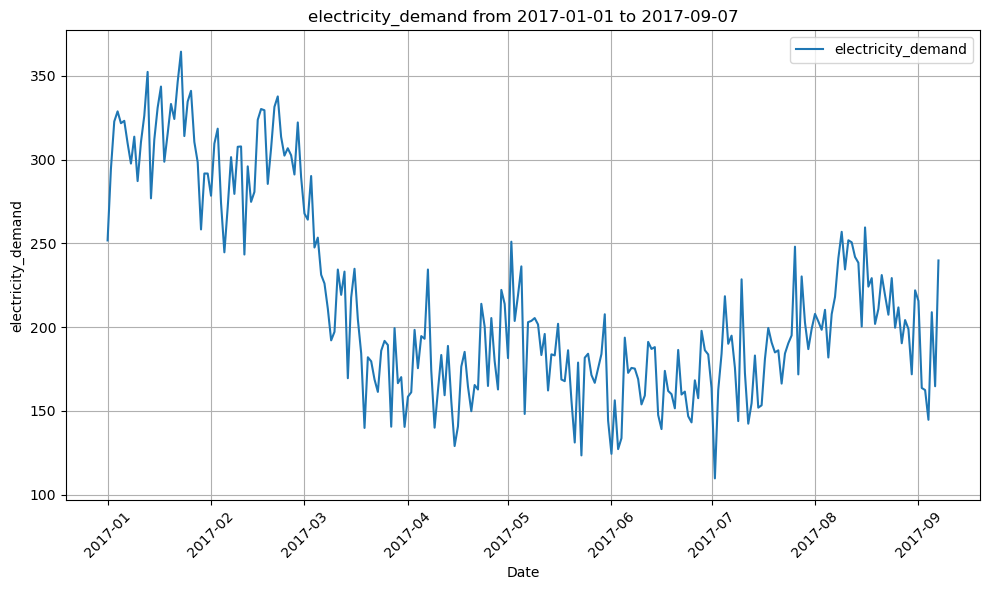

In [37]:
plot_feature_over_time(data, 'electricity_demand', '2017-01-01', '2017-09-07')

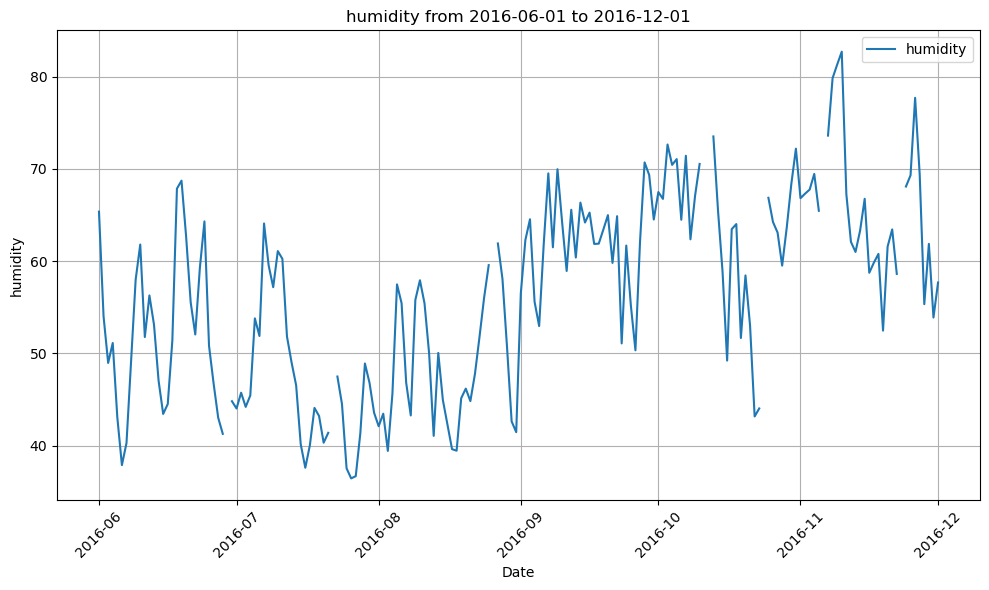

In [38]:
plot_feature_over_time(data, 'humidity', '2016-06-01', '2016-12-01')

### Data Preprocessing Evaluation Strategy

#### Handle inconsistencies
Formatting inconsistencies in the "wind_speed" column.

In [41]:
def convert_speed_data(data):
    def convert_speed(speed):
        if isinstance(speed, str):
            value, unit = speed.split()
            value = float(value)
            if unit.lower() == "km/h":
                return value / 3.6
            elif unit.lower() == "m/s":
                return value
            else:
                return 0.0
    return data['wind_speed'].apply(lambda x: convert_speed(x))

In [42]:
df_train['wind_speed'] = convert_speed_data(df_train)
df_test['wind_speed'] = convert_speed_data(df_test)

In [43]:
df_train.sample(10)

,date,weather_condition,humidity,wind_speed,oil_brent_price_indicator,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,temperature_station9,temperature_station10,electricity_demand
806,2017-02-18,Cloudy,65.677209,5.890000,Moderate,NaN,-4.336521,-4.754517,-3.900076,-5.371220,NaN,-4.737080,-4.086231,-5.496916,-3.660734,285.452850
265,2015-09-22,Cloudy,NaN,2.620000,Very Low,8.949155,8.937821,9.135397,8.494521,8.287283,8.170993,9.023531,8.980391,8.855257,9.378522,200.905141
135,2015-05-19,NaN,70.169126,1.300000,Moderate,14.681304,NaN,14.989890,14.621974,14.409331,15.355360,13.542096,14.582288,14.972883,14.134917,172.428321
65,2015-03-11,Cloudy,62.257481,2.300000,Moderate,15.570018,15.867824,15.529531,NaN,15.661436,15.998963,16.220936,NaN,15.393517,15.376436,186.530638
463,2016-03-31,Rainy,61.675378,4.469444,Very High,10.663195,NaN,NaN,11.263076,NaN,10.908166,10.549261,10.427083,10.579212,10.819361,254.070312
1492,2018-12-02,Snowy,61.792445,3.691667,Very Low,NaN,13.232396,12.419987,11.862377,13.377147,12.535153,12.247969,12.405633,12.688456,11.669275,198.705254
1677,2019-05-28,Rainy,68.201471,5.400000,Moderate,16.937179,17.820744,NaN,17.643455,18.029208,17.090045,16.829810,16.100805,17.182796,16.219417,183.518455
1713,2019-07-02,Sunny,42.369935,0.380000,Moderate,31.095619,30.815652,30.895622,30.813701,NaN,31.197675,NaN,30.667156,31.770917,31.355499,161.065248
413,2016-02-13,Rainy,71.952091,4.000000,Moderate,NaN,-4.396191,-4.604162,-4.859411,-4.662526,-5.370112,NaN,NaN,-4.347332,NaN,276.314811
1005,2017-08-27,Sunny,38.073259,4.270000,High,24.619756,NaN,24.125610,NaN,23.912639,NaN,24.504200,24.857742,24.322240,24.826191,190.394372


#### Handle duplicates

In [45]:
df_train_no_dupes = df_train.drop_duplicates()

In [46]:
# df_no_dupes[df_no_dupes.duplicated(keep=False)].sort_values(by=df_train.columns.tolist())

#### Handle missing values

In [48]:
features = ['humidity', 'wind_speed', 'temperature_station1',
       'temperature_station2', 'temperature_station3', 'temperature_station4',
       'temperature_station5', 'temperature_station6', 'temperature_station7',
       'temperature_station8', 'temperature_station9', 'temperature_station10']

In [49]:
df_train_ffill = df_train_no_dupes.copy()
df_train_ffill[features] = df_train_ffill[features].ffill()

df_test_ffill = df_test.copy()
df_test_ffill[features] = df_test_ffill[features].ffill()

In [50]:
df_train_ffill.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1819 entries, 0 to 1908
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       1819 non-null   object 
 1   weather_condition          1798 non-null   object 
 2   humidity                   1819 non-null   float64
 3   wind_speed                 1819 non-null   float64
 4   oil_brent_price_indicator  1819 non-null   object 
 5   temperature_station1       1819 non-null   float64
 6   temperature_station2       1817 non-null   float64
 7   temperature_station3       1819 non-null   float64
 8   temperature_station4       1819 non-null   float64
 9   temperature_station5       1819 non-null   float64
 10  temperature_station6       1819 non-null   float64
 11  temperature_station7       1819 non-null   float64
 12  temperature_station8       1819 non-null   float64
 13  temperature_station9       1819 non-null   float64
 1

#### Handle categorical values

In [52]:
df_train_encoded = pd.get_dummies(df_train_ffill, columns=['weather_condition'], dummy_na=False)
df_test_encoded = pd.get_dummies(df_test_ffill, columns=['weather_condition'], dummy_na=False)

In [53]:
le = LabelEncoder()
df_train_encoded['oil_brent_price_indicator_encoded'] = le.fit_transform(df_train_encoded['oil_brent_price_indicator'])
df_test_encoded['oil_brent_price_indicator_encoded'] = le.fit_transform(df_test_encoded['oil_brent_price_indicator'])

print("Encoding mappings:")
print("oil_brent_price_indicator:", dict(zip(le.classes_, le.transform(le.classes_))))              

Encoding mappings:
oil_brent_price_indicator: {'High': 0, 'Low': 1, 'Moderate': 2, 'Very High': 3, 'Very Low': 4}


In [54]:
df_train_encoded.sample(10)

,date,humidity,wind_speed,oil_brent_price_indicator,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,temperature_station9,temperature_station10,electricity_demand,weather_condition_Cloudy,weather_condition_Rainy,weather_condition_Snowy,weather_condition_Sunny,oil_brent_price_indicator_encoded
1271,2018-05-08,59.950990,4.230000,Moderate,18.913893,18.603755,18.251316,18.455817,19.201868,18.725780,18.168111,19.152093,19.328479,19.261230,159.460861,False,False,False,True,2
1538,2019-01-13,66.068554,2.720000,Moderate,-4.614283,-5.407716,-6.415379,-6.522927,-4.990599,-3.007029,-4.099108,-4.010163,-4.364352,-4.792498,321.648728,False,True,False,False,2
439,2016-03-08,71.992646,3.480000,High,11.199910,11.173289,11.271400,9.403163,11.470047,11.120065,11.355448,10.251867,11.664946,10.810153,249.292371,True,False,False,False,0
1241,2018-04-08,56.624827,0.738889,Moderate,17.501257,17.183834,17.659866,19.965964,17.753184,17.523013,20.031286,16.695539,17.228331,21.242824,153.169534,True,False,False,False,2
951,2017-07-06,58.467416,5.390000,Moderate,27.802723,28.329309,27.319707,26.813227,28.464025,27.572878,27.169077,27.007046,28.074736,28.488277,190.079925,False,False,False,True,2
1588,2019-03-03,60.512444,2.630000,Moderate,6.257647,3.248872,6.369303,6.113954,3.066016,7.023523,6.568471,2.804615,7.068672,5.983509,224.329963,False,False,False,True,2
150,2015-06-02,56.763324,2.588889,Low,19.527530,19.095926,16.714990,17.552935,20.107992,19.417059,17.391725,19.147260,20.099908,19.310433,144.856352,True,False,False,False,1
792,2017-02-06,72.113485,5.700000,Moderate,1.409333,1.567882,2.198031,2.612191,2.859126,2.066611,1.689135,2.590727,0.493566,0.021385,271.533230,False,False,True,False,2
1197,2018-02-23,77.535182,4.110000,Moderate,0.688349,1.687162,0.100026,0.613882,0.373406,1.066730,0.915116,1.275489,0.763288,0.598555,285.618324,True,False,False,False,2
1513,2018-12-22,73.037712,2.416667,High,0.504763,1.198353,4.680125,1.273563,0.193088,1.246851,0.406731,6.082879,4.864353,5.223014,263.918956,False,True,False,False,0


In [55]:
df_train_encoded = df_train_encoded.drop(columns=['oil_brent_price_indicator'], axis=1)
df_test_encoded = df_test_encoded.drop(columns=['oil_brent_price_indicator'], axis=1)

#### Handle outliers

In [57]:
Q1 = df_train_encoded['humidity'].quantile(0.25)
Q3 = df_train_encoded['humidity'].quantile(0.75)
IQR = Q3 - Q1
df_train_clean = df_train_encoded[(df_train_encoded['humidity'] <= Q3 + 1.5*IQR)]

In [58]:
z_scores = np.abs(stats.zscore(df_train_clean['electricity_demand']))
threshold = 3
df_train_clean = df_train_clean[z_scores <= threshold]

#### Feature Engineering

In [60]:
df_train_clean['date'] = pd.to_datetime(df_train_clean['date'])
df_train_clean['year'] = df_train_clean['date'].dt.year
df_train_clean['month'] = df_train_clean['date'].dt.month
df_train_clean['day'] = df_train_clean['date'].dt.day


df_test_encoded['date'] = pd.to_datetime(df_test_encoded['date'])
df_test_encoded['year'] = df_test_encoded['date'].dt.year
df_test_encoded['month'] = df_test_encoded['date'].dt.month
df_test_encoded['day'] = df_test_encoded['date'].dt.day


# data_clean['dayofweek'] = df_clean['date'].dt.dayofweek
# data_clean['is_weekend'] = df_clean['dayofweek'].isin([5, 6]).astype(int)
# data_clean['day_of_year'] = df_clean['date'].dt.dayofyear
# data_clean['week_of_year'] = df_clean['date'].dt.isocalendar().week
# data_clean['month_progress'] = df_clean['date'].dt.day / df_clean['date'].dt.days_in_month

In [61]:
"""
# Normalize the data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)

# Apply KNN imputation
imputer = KNNImputer(n_neighbors=3)
df_imputed = pd.DataFrame(imputer.fit_transform(df_scaled), columns=df_clean.columns)

# Inverse transform to get back to original scale
df_imputed = pd.DataFrame(scaler.inverse_transform(df_imputed), columns=df_clean.columns)

df_imputed.info()
"""

'\n# Normalize the data\nscaler = StandardScaler()\ndf_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)\n\n# Apply KNN imputation\nimputer = KNNImputer(n_neighbors=3)\ndf_imputed = pd.DataFrame(imputer.fit_transform(df_scaled), columns=df_clean.columns)\n\n# Inverse transform to get back to original scale\ndf_imputed = pd.DataFrame(scaler.inverse_transform(df_imputed), columns=df_clean.columns)\n\ndf_imputed.info()\n'

In [62]:
"""
y = df_imputed.pop('electricity_demand')
X = df_imputed.copy()

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reconvert to DataFrame with original column names and index
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
"""

"\ny = df_imputed.pop('electricity_demand')\nX = df_imputed.copy()\n\nscaler = MinMaxScaler()\nX_scaled = scaler.fit_transform(X)\n\n# Reconvert to DataFrame with original column names and index\nX_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)\n"

In [63]:
"""
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=15)  # Select top 5 features
X_new = selector.fit_transform(X_scaled, y)

selected_features = selector.get_support(indices=True)
feature_names = X.columns[selected_features]
print("Selected features:", feature_names)

# Reconvert to DataFrame with original column names and index
X_new = pd.DataFrame(X_new, columns=feature_names, index=X.index)
"""

'\nfrom sklearn.feature_selection import SelectKBest, f_classif\n\nselector = SelectKBest(f_classif, k=15)  # Select top 5 features\nX_new = selector.fit_transform(X_scaled, y)\n\nselected_features = selector.get_support(indices=True)\nfeature_names = X.columns[selected_features]\nprint("Selected features:", feature_names)\n\n# Reconvert to DataFrame with original column names and index\nX_new = pd.DataFrame(X_new, columns=feature_names, index=X.index)\n'

In [64]:
"""
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_new)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Dataset')
plt.colorbar()
plt.show()

print("Explained variance ratio:", pca.explained_variance_ratio_)
"""

'\nfrom sklearn.decomposition import PCA\n\npca = PCA(n_components=2)\nX_pca = pca.fit_transform(X_new)\n\nplt.figure(figsize=(8, 6))\nplt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)\nplt.xlabel(\'First Principal Component\')\nplt.ylabel(\'Second Principal Component\')\nplt.title(\'PCA of Dataset\')\nplt.colorbar()\nplt.show()\n\nprint("Explained variance ratio:", pca.explained_variance_ratio_)\n'

In [65]:
def evaluate_pipeline(X, y, n_splits=5):
    model = XGBRegressor()
    
    tscv = TimeSeriesSplit(n_splits=n_splits)
    
    train_scores = []
    val_scores = []
    
    for fold, (train_index, val_index) in enumerate(tscv.split(X)):
        print(f"Processing fold {fold + 1}/{n_splits}...")
        
        # Split data into train and validation sets
        X_train, X_val = X.iloc[train_index].copy(), X.iloc[val_index].copy()
        y_train, y_val = y.iloc[train_index].copy(), y.iloc[val_index].copy()

        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on training set
        y_train_pred = model.predict(X_train)
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_scores.append(train_mse)
        
        # Predict on validation set
        y_val_pred = model.predict(X_val)
        val_mse = mean_squared_error(y_val, y_val_pred)
        val_scores.append(val_mse)
        
        print(f"Fold {fold + 1} Train MSE: {train_mse:.4f}, Validation MSE: {val_mse:.4f}")
    
    # Compute mean, max, and min values for train and validation MSE
    mean_train_mse = np.mean(train_scores)
    max_train_mse = np.max(train_scores)
    min_train_mse = np.min(train_scores)
    
    mean_val_mse = np.mean(val_scores)
    max_val_mse = np.max(val_scores)
    min_val_mse = np.min(val_scores)
    
    # Print results
    print("\nTrain MSE:")
    print(f"Mean: {mean_train_mse:.4f}, Max: {max_train_mse:.4f}, Min: {min_train_mse:.4f}")
    
    print("\nValidation MSE:")
    print(f"Mean: {mean_val_mse:.4f}, Max: {max_val_mse:.4f}, Min: {min_val_mse:.4f}")
    
    return mean_val_mse  # Return mean validation MSE as the overall score

In [66]:
selected_columns = ['humidity', 'temperature_station1',
       'temperature_station2', 'temperature_station3', 'temperature_station4',
       'temperature_station5', 'temperature_station6', 'temperature_station7',
       'temperature_station8', 'temperature_station9', 'temperature_station10',
       'year', 'month', 'day', 'oil_brent_price_indicator_encoded', 'weather_condition_Cloudy',
       'weather_condition_Sunny', 'weather_condition_Rainy', 'weather_condition_Snowy']

X = df_train_clean.copy()[selected_columns]
y = df_train_clean.copy()['electricity_demand']

In [67]:
# Run the evaluation
evaluate_pipeline(X, y)

Processing fold 1/5...
Fold 1 Train MSE: 0.0034, Validation MSE: 586.5046
Processing fold 2/5...
Fold 2 Train MSE: 0.1213, Validation MSE: 521.1128
Processing fold 3/5...
Fold 3 Train MSE: 1.0862, Validation MSE: 476.6811
Processing fold 4/5...
Fold 4 Train MSE: 3.1661, Validation MSE: 472.0428
Processing fold 5/5...
Fold 5 Train MSE: 4.5473, Validation MSE: 524.3992

Train MSE:
Mean: 1.7848, Max: 4.5473, Min: 0.0034

Validation MSE:
Mean: 516.1481, Max: 586.5046, Min: 472.0428


516.1480926548631

### Generating Submission File

In [73]:
X_train = df_train_clean[selected_columns]
y_train = df_train_clean['electricity_demand']

X_test = df_test_encoded[selected_columns]

In [75]:
model = XGBRegressor()

model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

In [79]:
# Generating Submission File
submission = pd.DataFrame({
    'date': df_test_encoded['date'],
    'electricity_demand': y_test_pred
})

# Save the submission file
submission.to_csv('submission.csv', index=False, sep=',')
print("Submission file saved as 'submission.csv'.")

Submission file saved as 'submission.csv'.
